In [72]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
# Устанавливаем seed для повторяемости результатов
np.random.seed(42)
# Загружаем данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Преобразование размерности изображений
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
# Нормализация данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# Создаем последовательную модель
model = Sequential();
# Добавляем уровни сети
#скрытый слой 15 нейронов
model.add(Dense(15, input_dim=784, activation="sigmoid", kernel_initializer="normal"))
#выходной слой 10 нейронов
model.add(Dense(10, input_dim=784, activation="softmax", kernel_initializer="normal"))

# Компилируем модель
sgd = keras.optimizers.SGD(learning_rate=1)
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
print(model.summary())
# Обучаем сеть
#Batch size – количество обучающих примеров за одну итерацию.
model.fit(X_train, Y_train, batch_size=32, epochs=2000);
#model.fit(X_train, Y_train, batch_size=32, epochs=2000, verbose=2, validation_split=0.2);

# Оцениваем качество обучения сети на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0);
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                11775     
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2000
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2267 - accuracy: 0.2375
Epoch 2/2000
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7468 - accuracy: 0.5255
Epoch 3/2000
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2337 - accuracy: 0.6985
Epoch 4/2000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9367 - accuracy: 0.7821
Epoch 5/2000
1875/1875 [===

Точность растет очень медленно: на больших эпохах по несколько тысячных процента.

длина:
11760


TypeError: ignored

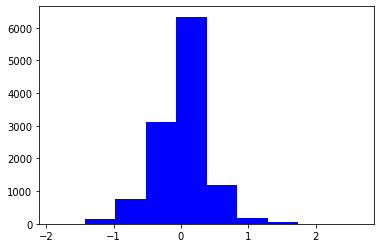

In [73]:
a = np.array(model.get_weights()[0]).flatten();
plt.hist(a, facecolor='blue')
#plt.hist(a, bins=400, facecolor='blue')
print("длина:")
print(len(a))
#print("вектор:")
#print(a)
T0 = 0.001
T1 = 0.0001
T2 = 0.00001
zerj_num = sum(model.get_weights()[0].flatten() == 0)
zero_num_under0 = sum(abs(model.get_weights()[0].flatten()) <= T0)
zero_num_under1 = sum(abs(model.get_weights()[0].flatten()) <= T1)
zero_num_under2 = sum(abs(model.get_weights()[0].flatten()) <= T2)
print("количество точных нулей: %.2f" % (zerj_num))
print("Процентное точных нулей: %.2f%%" % ((zerj_num/11760)*100))
print("количество пороговых нулей (Т=0.001): %.2f" % (zero_num_under0))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under0/11760)*100))
print("количество пороговых нулей (Т=0.0001): %.2f" % (zero_num_under1))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under1/11760)*100))
print("количество пороговых нулей (Т=0.00001): %.2f" % (zero_num_under2))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under2/11760)*100))

(11760,)
(15, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
layer1
[516.59447563 487.88103664 468.21062836 452.03268355 437.42543995
 423.91513595 411.18971965 398.98693484 387.63015872 376.90178642
 366.57977873 356.82135266 347.70720828 339.05339536 330.80803961]


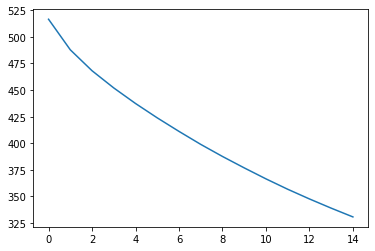

In [66]:
weight_origin=model.layers[0].get_weights()[0].flatten()
weight_origin2=model.layers[1].get_weights()[0]
#уточнить длину
print(weight_origin.shape)
print(weight_origin2.shape)
#отсортировать
weight_origin.sort()
weight_origin2.sort()

layer1 = np.empty(15)
layer2 = np.empty(15)
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
print(x)

for i in range(15):
  sum1 = 0
  for j in range(784):
    sum1 = sum1 + weight_origin[i*15 + j]*weight_origin[i*15 + j]
  layer1[i] = sum1

print("layer1")
print(layer1)
plt.plot(x,layer1)
#print("layer2")
#print(layer2)


Теперь увеличим число нейронов на скрытом слое (15 ->1 500). 

---



#Большая сеть

In [67]:
# Создаем последовательную модель
model2 = Sequential();

# Добавляем уровни сети
#скрытый слой 1500 нейронов
model2.add(Dense(1500, input_dim=784, activation="sigmoid", kernel_initializer="normal"))
#выходной слой 10 нейронов
model2.add(Dense(10, input_dim=784, activation="softmax", kernel_initializer="normal"))

# Компилируем модель
model2.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model2.summary())

# Обучаем сеть
#Batch size – количество обучающих примеров за одну итерацию.
model2.fit(X_train, Y_train, batch_size=32, epochs=10);

# Оцениваем качество обучения сети на тестовых данных
scores = model2.evaluate(X_test, Y_test, verbose=0);
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1500)              1177500   
                                                                 
 dense_3 (Dense)             (None, 10)                15010     
                                                                 
Total params: 1,192,510
Trainable params: 1,192,510
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.9765 - accuracy: 0.7726
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5103 - accuracy: 0.8693
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4279 - accuracy: 0.8826
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3900 - accuracy: 0.8909
Epoch 5/10
1875/1875 [=

длина:
1176000


TypeError: ignored

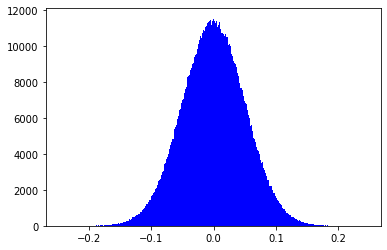

In [70]:
a = np.array(model2.get_weights()[0]).flatten();
plt.hist(a, bins=400, facecolor='blue')
##
print("длина:")
print(len(a))
T0 = 0.001
T1 = 0.0001
T2 = 0.00001
zerj_num = sum(model2.get_weights()[0].flatten() == 0)
zero_num_under0 = sum(abs(model2.get_weights()[0].flatten()) <= T0)
zero_num_under1 = sum(abs(model2.get_weights()[0].flatten()) <= T1)
zero_num_under2 = sum(abs(model2.get_weights()[0].flatten()) <= T2)
print("количество точных нулей: %.2f" % (zerj_num))
print("Процентное точных нулей: %.2f%%" % ((zerj_num/1176000)*100))
print("количество пороговых нулей (Т=0.001): %.2f" % (zero_num_under0))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under0/1176000)*100))
print("количество пороговых нулей (Т=0.0001): %.2f" % (zero_num_under1))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under1/1176000)*100))
print("количество пороговых нулей (Т=0.00001): %.2f" % (zero_num_under2))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under2/1176000)*100))

(1176000,)
(1500, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
layer1
[24.17611095 23.80265988 23.54414387 23.31562274 23.12001231 22.94339216
 22.78096787 22.63021215 22.48513511 22.34731637 22.21417757 22.08685514
 21.96620392 21.85116698 21.74095905]


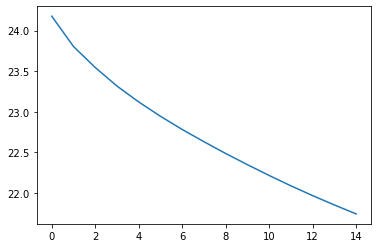

In [74]:
weight_origin=model2.layers[0].get_weights()[0].flatten()
weight_origin2=model2.layers[1].get_weights()[0]
#уточнить длину
print(weight_origin.shape)
print(weight_origin2.shape)
#отсортировать
weight_origin.sort()
weight_origin2.sort()

layer1 = np.empty(15)
layer2 = np.empty(15)
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
print(x)

for i in range(15):
  sum1 = 0
  for j in range(784):
    sum1 = sum1 + weight_origin[i*15 + j]*weight_origin[i*15 + j]
  layer1[i] = sum1

print("layer1")
print(layer1)
plt.plot(x,layer1)
#print("layer2")
#print(layer2)

#5000 НЕЙРОНОВ

In [ ]:
# Создаем последовательную модель
model3 = Sequential();

# Добавляем уровни сети
#скрытый слой 1500 нейронов
model3.add(Dense(5000, input_dim=784, activation="sigmoid", kernel_initializer="normal"))
#выходной слой 10 нейронов
model3.add(Dense(10, input_dim=784, activation="softmax", kernel_initializer="normal"))

# Компилируем модель
model3.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model3.summary())

# Обучаем сеть
#Batch size – количество обучающих примеров за одну итерацию.
model3.fit(X_train, Y_train, batch_size=32, epochs=10);

# Оцениваем качество обучения сети на тестовых данных
scores = model3.evaluate(X_test, Y_test, verbose=0);
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5000)              3925000   
                                                                 
 dense_5 (Dense)             (None, 10)                50010     
                                                                 
Total params: 3,975,010
Trainable params: 3,975,010
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.7169 - accuracy: 0.7950
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.4176 - accuracy: 0.8784
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3744 - accuracy: 0.8913
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3531 - accuracy: 0.8973
Epoch 5/10
1875/187

длина:
3920000
количество точных нулей: 0.00
Процентное точных нулей: 0.00%
количество пороговых нулей (Т=0.001): 62525.00
Процентное точных нулей: 1.5950%
количество пороговых нулей (Т=0.0001): 6277.00
Процентное точных нулей: 0.1601%
количество пороговых нулей (Т=0.00001): 661.00
Процентное точных нулей: 0.0169%


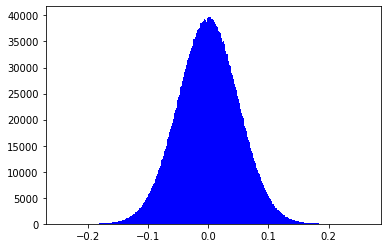

In [ ]:
a = np.array(model3.get_weights()[0]).flatten();
plt.hist(a, bins=400, facecolor='blue')
print("длина:")
print(len(a))
T0 = 0.001
T1 = 0.0001
T2 = 0.00001
zerj_num = sum(model3.get_weights()[0].flatten() == 0)
zero_num_under0 = sum(abs(model3.get_weights()[0].flatten()) <= T0)
zero_num_under1 = sum(abs(model3.get_weights()[0].flatten()) <= T1)
zero_num_under2 = sum(abs(model3.get_weights()[0].flatten()) <= T2)
print("количество точных нулей: %.2f" % (zerj_num))
print("Процентное точных нулей: %.2f%%" % ((zerj_num/3920000)*100))
print("количество пороговых нулей (Т=0.001): %.2f" % (zero_num_under0))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under0/3920000)*100))
print("количество пороговых нулей (Т=0.0001): %.2f" % (zero_num_under1))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under1/3920000)*100))
print("количество пороговых нулей (Т=0.00001): %.2f" % (zero_num_under2))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under2/3920000)*100))